In [1]:
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [9]:
df = pd.concat(map(pd.read_csv,['./lop71.csv','./lop72.csv']),ignore_index=True)

df = df.iloc[:,1:]
df[df > 10] = np.nan
df[df < 0] = np.nan
df.fillna(df.mean(),inplace=True)
df.drop_duplicates(inplace=True)


df['10%'] = df['10%'] * 0.1
df['20%_1'] = df['20%_1'] * 0.2
df['20%_2'] = df['20%_2'] * 0.2

df['10%'] = (df['10%']-df['10%'].min()) / (df['10%'].max()-df['10%'].min())
df['20%_1'] = (df['20%_1']-df['20%_1'].min()) / (df['20%_1'].max()-df['20%_1'].min())
df['20%_2'] = (df['20%_2']-df['20%_2'].min()) / (df['20%_2'].max()-df['20%_2'].min())

<AxesSubplot: >

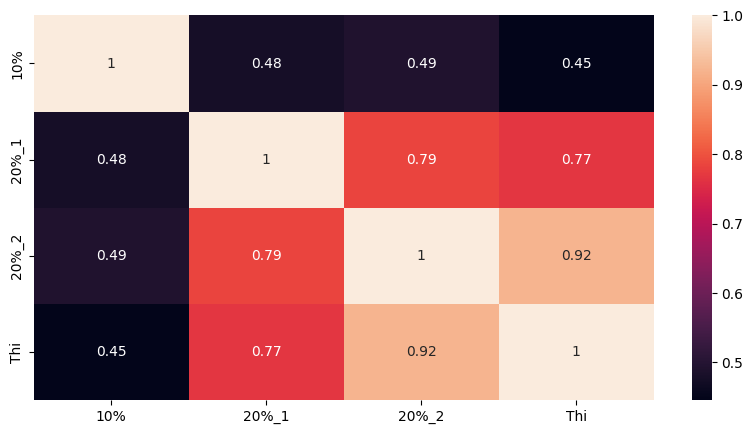

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr,ax=ax,annot=True)

        10%     20%_1     20%_2
0    0.6500  0.742857  0.666667
1    0.5500  0.628571  0.666667
2    0.6500  0.800000  0.777778
3    0.7250  0.628571  0.777778
4    0.7500  0.571429  0.666667
..      ...       ...       ...
148  0.7375  0.742857  0.833333
149  0.7250  0.771429  0.777778
150  0.7125  0.771429  0.750000
151  0.7750  0.728571  0.833333
152  0.7875  0.700000  0.750000

[140 rows x 3 columns]       Thi
0    6.50
1    5.00
2    6.75
3    6.00
4    6.00
..    ...
148  7.00
149  7.00
150  7.00
151  7.00
152  7.00

[140 rows x 1 columns]
(112, 3) (112, 1) (14, 3) (14, 1) (14, 3) (14, 1)
Epoch 1/200
4/4 [==============================] - 1s 55ms/step - loss: 42.8226 - mse: 42.8226 - val_loss: 40.6179 - val_mse: 40.6179
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 41.1729 - mse: 41.1729 - val_loss: 38.7393 - val_mse: 38.7393
Epoch 3/200
4/4 [==============================] - 0s 14ms/step - loss: 39.2364 - mse: 39.2364 - val_loss: 36.5606 - val_mse: 36.5

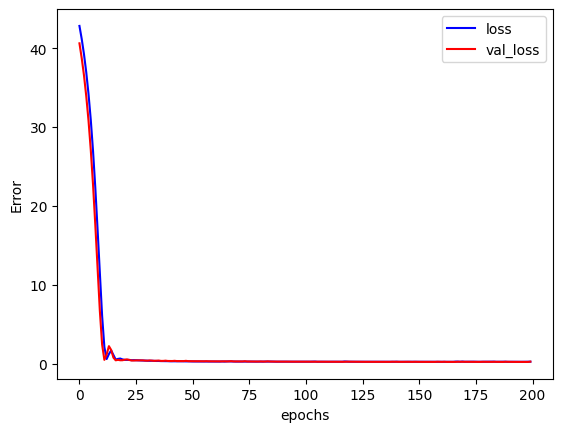

In [126]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]
print(X,Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=1,test_size=0.2)
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,random_state=1,test_size=0.5)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,X_val.shape,Y_val.shape)

model = Sequential()
model.add(Dense(128,input_dim=3,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='Adam',loss='mse',metrics='mse')

model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=200,batch_size=32)
model.save('./model1_.h5')
plt.plot(model.history.history['loss'],label='loss',color='blue')
plt.plot(model.history.history['val_loss'],label='val_loss',color='red')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [127]:
# model = load_model('./model1_.h5')
yhat = model.predict([X_test])
print(r2_score(yhat,Y_test))
x = model.predict([[1,1,1]])
print(x)

1/1 [==============================] - 0s 62ms/step
0.9013630052923427
1/1 [==============================] - 0s 76ms/step
[[8.933788]]
